[View in Colaboratory](https://colab.research.google.com/github/lycohen/ds_desafio_I/blob/master/desafio1_precio_v2.ipynb)

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#from unidecode import unidecode #QUITO TILDES

In [0]:
# Cargar la data de properati
df = pd.read_csv('properatti.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI


In [0]:
##estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [0]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [0]:
#Obtenemos un dataframe con los valores dummies del tipo de moneda
dummies_price = pd.get_dummies(df['currency'])

In [0]:
#Filtramos en una nueva columna los valores que están en ARS
df["ars"] = df["price"] * dummies_price["ARS"]
dummies_price["ARS"].value_counts()

0    108001
1     13219
Name: ARS, dtype: int64

In [0]:
ars = df["ars"]
ars.isnull().value_counts()

False    100810
True      20410
Name: ars, dtype: int64

In [0]:
#Calculamos el valor aproximado del USD según los precios que están en pesos "ars"
#y que tienen el precio aproximado en USD en la columna "price_aprox_usd" y lo guardamos
#en una nueva columna "USDaprox"
df["USDaprox"] = df["ars"] / (df["price_aprox_usd"] * dummies_price["ARS"])

In [0]:
#Miramos los estadísticos de la distribución del precio aproximado del USD
df["USDaprox"].describe()

count    13219.000000
mean        17.814183
std          0.102316
min         17.143000
25%         17.830500
50%         17.830501
75%         17.830502
max         17.830531
Name: USDaprox, dtype: float64

In [0]:
#Encontramos el valor que se utiliza en la mediana de los casos para el dólar
# y así trabajar con este valor para las aproximaciones que hagan falta
df["USDaprox"].median()

17.830501005171033

In [0]:
#Chequeamos de otra forma el valor del USD usando el precio por M2 en ars y en USD
#Dividiendo el precio en ars por el precio en USD
df["USDaprox1"] = df["price_per_m2"] / df["price_usd_per_m2"]

In [0]:
#Comprobamos que esta forma de aproximar el valor de USD no nos sirve. Los valores
#son muy dispersos así que trabajaremos con la mediana del cálculo anterior
df["USDaprox1"].describe()

count    63350.000000
mean         5.869295
std        158.413517
min          0.001061
25%          1.000000
50%          1.125000
75%          1.626609
max      23848.295570
Name: USDaprox1, dtype: float64

In [0]:
#Asignamos un valor a USD
USD = df["USDaprox"].median()

In [0]:
#Armamos una nueva columna donde vamos a imputar los precios por M2 en USD de forma que
#podamos usarlo como valorizador. Lo llenamos en principio con los valores de price_usd_per_m2
y = df.loc[(df["price_per_m2"] < 200000) & (df["price_per_m2"] > 100)]["price_per_m2"]
df["newusd_per_m2"] = df["price_usd_per_m2"].fillna(y)

In [0]:
y.describe()

count     87490.000000
mean       6323.049038
std       12511.049353
min         101.694915
25%        1550.000000
50%        2212.292251
75%        3347.754811
max      195000.000000
Name: price_per_m2, dtype: float64

In [0]:
df["newusd_per_m2"].describe()

count     92819.000000
mean       3175.944095
std        7337.155863
min           0.600000
25%        1271.690005
50%        1854.166667
75%        2571.428571
max      206333.333333
Name: newusd_per_m2, dtype: float64

In [0]:
df["newusd_per_m2"].sample(30)

43608      3166.666667
3471               NaN
76512              NaN
40000              NaN
51459      3765.060241
10348      1928.104575
40409      1625.000000
40127      1022.358646
5785      12515.890756
78881      3044.871795
95914       642.857143
6448       2052.631579
36907      4017.857143
76122     15000.000000
44080     51150.000000
60175       848.214286
118580     1875.000000
855        1760.326250
35939      1875.000000
97771      1439.024390
80580      1911.764706
66356      1555.555556
100103     2250.000000
67355      1900.000000
33970      1698.000000
94710      3181.818182
115303             NaN
15958      1355.932203
118503     1304.347826
4685               NaN
Name: newusd_per_m2, dtype: float64

In [0]:
#Continuamos imputando los NaN con los valores que podemos obtener
#de dividir el precio total en usd "price" por la superficie en M2

In [0]:
df["newprice_m2_ars"] = df["price"] / df.loc[(df["surface_total_in_m2"] < 10000)]["surface_total_in_m2"]
df["newprice_m2_usd"] = df["price"] / df.loc[(df["surface_total_in_m2"] < 10000)]["surface_total_in_m2"]
df["newprice_m2"] = df["newprice_m2_usd"]*dummies_price["USD"] + df["newprice_m2_ars"]*dummies_price["ARS"]

In [0]:
#df["newprice_m2"].fillna(0, inplace=True)

In [0]:
newprice = df["newprice_m2"]

In [0]:
df["newusd_per_m2"] = df["newusd_per_m2"].fillna(newprice)

In [0]:
df["newusd_per_m2"].isna().sum()

28401

In [0]:
df["newusd_per_m2"].describe()

count     92819.000000
mean       3175.944095
std        7337.155863
min           0.600000
25%        1271.690005
50%        1854.166667
75%        2571.428571
max      206333.333333
Name: newusd_per_m2, dtype: float64

In [0]:
dfPrecio = df.loc[:,['place_name','property_type']].copy()
dfPrecio['place_name_id'] = df['place_name'].astype('category').cat.codes
dfPrecio['property_type_id'] = df['property_type'].astype('category').cat.codes
dfPrecio['currency_id'] = df['currency'].astype('category').cat.codes

In [0]:
dfPrecio['precio_calculado']=df['newusd_per_m2']
dfPrecio = pd.concat([dfPrecio, dummies_price], axis=1);
dfPrecio2=dfPrecio

In [0]:
dfPrecio["precio_calculado"] = dfPrecio.groupby(['place_name_id','property_type_id'])['precio_calculado'].transform(lambda x: x.fillna(x.median()))
print('Sin Imputar:',dfPrecio["precio_calculado"].isna().sum() )
dfPrecio["precio_calculado"].describe()
print('Imputados:',dfPrecio[(~dfPrecio['precio_calculado'].isna()) ]['precio_calculado'].count())
print('Mediana Imputados:',dfPrecio[(~dfPrecio['precio_calculado'].isna()) ]['precio_calculado'].median())

/opt/conda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Sin Imputar: 632
Imputados: 120588
Mediana Imputados: 1752.6146875


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


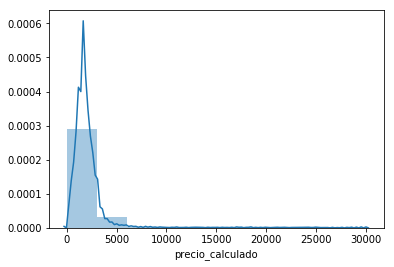

In [0]:
sns.distplot(dfPrecio[(dfPrecio['precio_calculado']<30000) & (dfPrecio['precio_calculado']>1)]['precio_calculado'], bins=10)

In [0]:
price_new = dfPrecio[(dfPrecio['precio_calculado']<30000) & (dfPrecio['precio_calculado']>1)]['precio_calculado']

In [0]:
price_new.describe()

count    119290.000000
mean       2356.721436
std        3125.063464
min           1.184571
25%        1236.842105
50%        1752.614687
75%        2405.063291
max       29994.545455
Name: precio_calculado, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


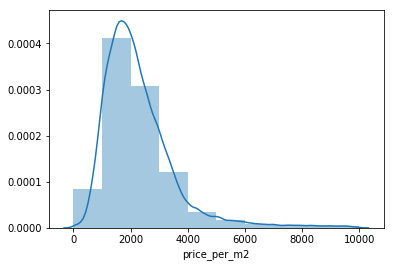

In [0]:
sns.distplot(df[(df["price_per_m2"]<10000) & (df["price_per_m2"]>1)]["price_per_m2"], bins=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


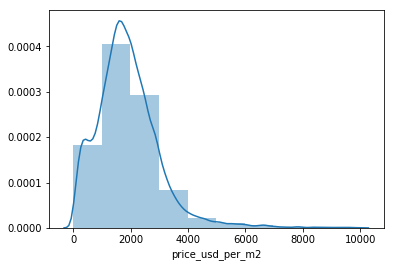

In [0]:
sns.distplot(df[(df["price_usd_per_m2"]<10000) & (df["price_usd_per_m2"]>1)]["price_usd_per_m2"], bins=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


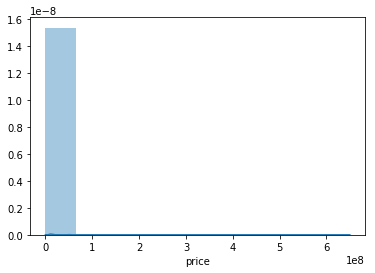

In [0]:
sns.distplot(df["price"].dropna(), bins= 10)